# Ejercicio 5

In [45]:
import random as rnd
import numpy as np

def var_exp(l):
    ''' genera valores con distribucion exponencial
    '''
    u = 1 - rnd.random()
    return -np.log(u) / l

def exp_acc(x, l):
    ''' funcion de probabilidad acumulada de una exponencial 
    '''
    return np.exp(-l*x) * (np.exp(l*x) - 1)

def intersec_var(vars):
    xs = [ v() for v in vars]
    return max(xs)       

vars = [
    lambda :var_exp(1/5),
    lambda :var_exp(1/3),
    lambda :var_exp(1/7),
]

rnd.seed(1000)
intersec_var(vars)

7.51092041190095

In [46]:
import time

def get_probs(g, nsim, *args):
    rnd.seed(1000)
    acc = []

    start = time.perf_counter()
    for _ in range(nsim):
        r = g(*args)
        acc.append(r)

    end = time.perf_counter()

    perf = end - start
    return acc, perf

Media estimada	: 9.674354970800009


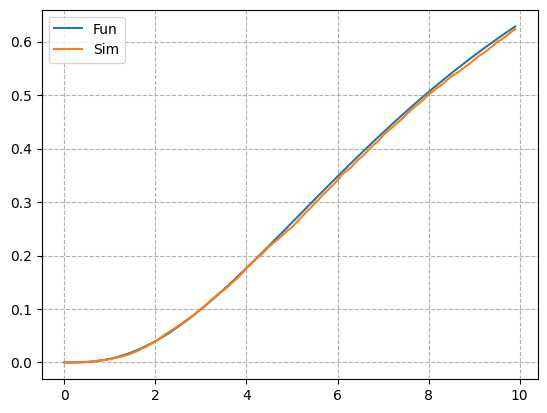

In [47]:
import matplotlib.pyplot as plt

nsim = 10_000

acc, perf = get_probs(intersec_var, nsim, vars)

x = np.arange(0,10,0.1)

def fun(x):
    return lambda x: exp_acc(x,1/3) * exp_acc(x,1/5) * exp_acc(x,1/7)

y = list(map(fun(x), x))
plt.plot(x,y, label=f'Fun')

y = []
for i in x:
    f_le = list(filter(lambda k : k <= i, acc))
    v = len(f_le) / nsim
    y.append(v)

print(f'Media estimada\t: {np.mean(acc)}')
plt.plot(x,y, label='Sim')

plt.grid(linestyle = '--')
plt.legend()
plt.show()

In [48]:
def union_var(vars):
    xs = [ v() for v in vars]
    return min(xs)       

vars = [
    lambda :var_exp(1/5),
    lambda :var_exp(1/3),
    lambda :var_exp(1/7),
]

rnd.seed(1000)
union_var(vars)

0.7308348368407576

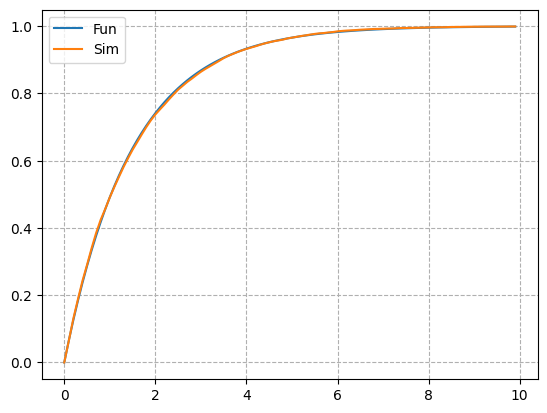

In [49]:
import matplotlib.pyplot as plt

nsim = 10_000

acc, perf = get_probs(union_var, nsim, vars)

x = np.arange(0,10,0.1)

def fun(x):
    return lambda x: 1 - ((1 - exp_acc(x,1/3)) * (1 - exp_acc(x,1/5)) * (1 - exp_acc(x,1/7)))

y = list(map(fun(x), x))
plt.plot(x,y, label=f'Fun')

y = []
for i in x:
    f_le = list(filter(lambda k : k <= i, acc))
    v = len(f_le) / nsim
    y.append(v)

plt.plot(x,y, label='Sim')

plt.grid(linestyle = '--')
plt.legend()
plt.show()